In [1]:
import numpy as np
import sportvu
import os
import pandas
from os.path import join
from sportvu.vis.Event import Event, EventException
import cPickle as pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = '/home/ethanf/gobi5/ethanf/data/nba/'
f_data_config = '/home/ethanf/gobi5/ethanf/projects/sportvu/sportvu/data/config/ethanf_seq.yaml'
files = os.listdir(join(data_dir,'data'))
example = pickle.load(open(join(data_dir,'data','0021500357.pkl'),'r'))
print example.keys()
events = example['events']

['gamedate', 'gameid', 'events']


In [3]:
from sportvu.data.dataset import SeqDataset
from sportvu.data.extractor import BaseExtractor, EthanSeqExtractor
from sportvu.data.loader import BaseLoader


In [4]:
dataset = SeqDataset(f_data_config)
extractor = EthanSeqExtractor(f_data_config)

e = Event(events[0], gameid=example['gameid'])

In [5]:
val2 = []
for e in dataset.get_next_val():
    val2.append(e)

In [6]:
e = dataset.propose_Ta()
e

{'end_time_left': 558.8,
 'home': {u'abbreviation': u'TOR',
  u'name': u'Toronto Raptors',
  u'players': [{u'firstname': u'Luis',
    u'jersey': u'4',
    u'lastname': u'Scola',
    u'playerid': 2449,
    u'position': u'F'},
   {u'firstname': u'Kyle',
    u'jersey': u'7',
    u'lastname': u'Lowry',
    u'playerid': 200768,
    u'position': u'G'},
   {u'firstname': u'DeMar',
    u'jersey': u'10',
    u'lastname': u'DeRozan',
    u'playerid': 201942,
    u'position': u'G'},
   {u'firstname': u'James',
    u'jersey': u'3',
    u'lastname': u'Johnson',
    u'playerid': 201949,
    u'position': u'F'},
   {u'firstname': u'DeMarre',
    u'jersey': u'5',
    u'lastname': u'Carroll',
    u'playerid': 201960,
    u'position': u'F'},
   {u'firstname': u'Patrick',
    u'jersey': u'54',
    u'lastname': u'Patterson',
    u'playerid': 202335,
    u'position': u'F'},
   {u'firstname': u'Bismack',
    u'jersey': u'8',
    u'lastname': u'Biyombo',
    u'playerid': 202687,
    u'position': u'C-F'},
   {

In [7]:
extracted = extractor.extract_raw(e,sorted=True)
np.array(extracted[0]).shape

AttributeError: 'dict' object has no attribute 'moments'

In [8]:
event_arr = [Event(events[i], gameid=example['gameid']) for i in range(5)]
print event_arr

[<sportvu.vis.Event.Event instance at 0x7fce5cbd7248>, <sportvu.vis.Event.Event instance at 0x7fce62f08638>, <sportvu.vis.Event.Event instance at 0x7fce61167368>, <sportvu.vis.Event.Event instance at 0x7fce60cf5d88>, <sportvu.vis.Event.Event instance at 0x7fce60936488>]


In [9]:
seq = extractor.extract_batch(event_arr)

In [10]:
events = [dataset.propose_Ta(train=True,return_Event=True) for i in range(5)]
inputs, labels, masks = extractor.extract_batch(events)

In [11]:
events[0]

<sportvu.vis.Event.Event instance at 0x7fce692077e8>

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python2.7/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


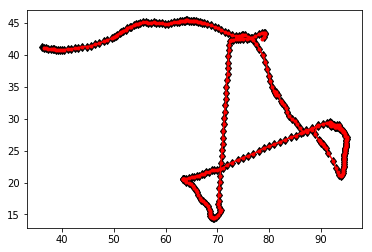

In [12]:
plt.plot(inputs[0,0,:,0],inputs[0,0,:,1],'kd')
plt.hold(True)
plt.plot(labels[0,0,:,0],labels[0,0,:,1],'.-r')


In [13]:
temp = np.array([np.array(x) for x in extractor.extract_raw(e)])
print temp.shape
print np.array(temp[0]).shape
print np.array(temp[1]).shape
print np.array(temp[2]).shape
plt.plot(temp[0][0,:10,0],temp[0][0,:10,1],'*-')
plt.hold(True)
for i in range(5):
    plt.plot(temp[1][i,:10,0],temp[1][i,:10,1])
for i in range(5):
    plt.plot(temp[2][i,:10,0],temp[2][i,:10,1])
        

AttributeError: 'dict' object has no attribute 'moments'

In [ ]:
print seq.shape
print masks.shape

In [ ]:
masks[0,:]

In [ ]:
temp = [[0,1],[2,3],[4,5]]
a,b = zip(*temp)
print a

In [14]:
dist = []
e_ = [events[0]]
for e in e_:
    for i in range(len(e.moments)-1):
        x1 = np.array([player.x for player in e.moments[i].players])
        y1 = np.array([player.y for player in e.moments[i].players])
        x2 = np.array([player.x for player in e.moments[i+1].players])
        y2 = np.array([player.y for player in e.moments[i+1].players])
        dist.append((x1-x2)**2 +(y1-y2)**2)

In [15]:
dist = np.array(dist).sum(axis=1)
sorted(dist)


[0.10893707410000114,
 0.1103622151000006,
 0.11209095849999973,
 0.11260813239999895,
 0.11857905059999789,
 0.11897611420000175,
 0.12073814759999991,
 0.12539394650000049,
 0.13153937230000071,
 0.13429014030000011,
 0.13524315030000042,
 0.13585698959999989,
 0.13729785389999968,
 0.13854454219999923,
 0.14043766440000091,
 0.14086802890000052,
 0.14293698380000017,
 0.14918387309999945,
 0.15319846879999993,
 0.15383433800000035,
 0.15432463059999765,
 0.15833329869999976,
 0.16026531860000071,
 0.16088811309999898,
 0.16117015000000087,
 0.16216548210000006,
 0.16235428380000064,
 0.16475234930000007,
 0.16541579929999928,
 0.16810675500000027,
 0.1697998062999993,
 0.17040137160000091,
 0.17114261869999847,
 0.17422597379999946,
 0.17469011000000123,
 0.17555645750000015,
 0.17958829020000094,
 0.18006917670000108,
 0.1801244751000016,
 0.18171144720000135,
 0.1888675535000002,
 0.19084896509999982,
 0.19377555449999984,
 0.2033303952000004,
 0.20474269519999846,
 0.207015393000

In [ ]:
e

In [ ]:
dist = np.sort(dist)
plt.plot(np.log(dist))


In [ ]:
extractor.thresh

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dist)
plt.show()

In [ ]:
seq = [np.random.randn(10,22,10),[],np.random.randn(10,22,10)]
np.array(seq).shape